In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/Users/pault/paultangerusda drive/2020_Sync/COVID analysis (Paul Tanger)/data/SME_data/from_Anna/long_rfs_pt.csv') 

/usr/local/anaconda3/envs/py377/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4,7,8,9,10,11,12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4790354 entries, 0 to 4790353
Data columns (total 15 columns):
 #   Column        Dtype  
---  ------        -----  
 0   country       object 
 1   round_number  int64  
 2   round_month   object 
 3   weight        float64
 4   hhid          object 
 5   sector        object 
 6   state         object 
 7   gender        object 
 8   age           object 
 9   age_range     object 
 10  category      object 
 11  question      object 
 12  short_name    object 
 13  disaggregate  object 
 14  value         object 
dtypes: float64(1), int64(1), object(13)
memory usage: 548.2+ MB


In [4]:
data.head()

,country,round_number,round_month,weight,hhid,sector,state,gender,age,age_range,category,question,short_name,disaggregate,value
0,Ethiopia,2,May,6015.957520,010101088800910017,Rural,Tigray,Female,40,40-49,NaN,NaN,Probability Of Moderate Or Severe Food Insecurity,NaN,0.993522301176378
1,Ethiopia,2,May,7622.499512,010101088800910029,Rural,Tigray,Female,20,20-29,NaN,NaN,Probability Of Moderate Or Severe Food Insecurity,NaN,0.999109821576038
2,Ethiopia,2,May,8636.837891,010101088800910054,Rural,Tigray,Female,30,30-39,NaN,NaN,Probability Of Moderate Or Severe Food Insecurity,NaN,0.94499133081077
3,Ethiopia,2,May,8740.465820,010101088800910082,Rural,Tigray,Male,33,30-39,NaN,NaN,Probability Of Moderate Or Severe Food Insecurity,NaN,0.993522301176378
4,Ethiopia,2,May,20277.939453,010101088800910093,Rural,Tigray,Female,53,50-59,NaN,NaN,Probability Of Moderate Or Severe Food Insecurity,NaN,0.761864937660114


In [5]:
data.columns

Index(['country', 'round_number', 'round_month', 'weight', 'hhid', 'sector',
       'state', 'gender', 'age', 'age_range', 'category', 'question',
       'short_name', 'disaggregate', 'value'],
      dtype='object')

In [12]:
data['country'].unique()

array(['Ethiopia', 'Malawi', 'Nigeria', 'Uganda', 'Mali', 'Burkina Faso'],
      dtype=object)

In [6]:
data['sector'].unique()

array(['Rural', 'Urban', nan], dtype=object)

In [7]:
data['category'].unique()

array([nan, 'Knowledge/Behavior about COVID-19', 'Access', 'Employment',
       'Food Security', 'Loss of Income/Coping - Resilience',
       'Aid or Support', 'Demographics', 'Fragility'], dtype=object)

In [10]:
questions = list(data['question'].unique())

In [11]:
questions

[nan,
 'Have you heard about the coronavirus?',
 'To your knowledge, what measures can you adopt to reduce the risk of contracting coronavirus? handwashing',
 'To your knowledge, what measures can you adopt to reduce the risk of contracting coronavirus? use of sanitizer',
 'To your knowledge, what measures can you adopt to reduce the risk of contracting coronavirus? no handshake/physical greetings',
 'To your knowledge, what measures can you adopt to reduce the risk of contracting coronavirus? use of mask',
 'To your knowledge, what measures can you adopt to reduce the risk of contracting coronavirus? use of gloves',
 'To your knowledge, what measures can you adopt to reduce the risk of contracting coronavirus? avoid travel',
 'To your knowledge, what measures can you adopt to reduce the risk of contracting coronavirus? staying at home and aviod going out unless necessary',
 'To your knowledge, what measures can you adopt to reduce the risk of contracting coronavirus? avoid crowded pla

In [9]:
data['short_name'].unique()

array(['Probability Of Moderate Or Severe Food Insecurity',
       'Probability Of Severe Food Insecurity', nan,
       'Heard Of Coronavirus', 'Covid-19 Knowledge',
       'Government Response', 'Satisfied With Government Response',
       'Reason Dissatisfied With Government Response',
       'Covid-19 Behavior', 'Need To Buy', 'Able To Buy',
       'Reason Unable To Buy Medicine: Out Of Stock',
       'Reason Unable To Buy Medicine: Local Markets Not Operating/Closed',
       'Reason Unable To Buy Medicine: Limited/No Transportation',
       'Reason Unable To Buy Medicine: Restriction To Go Outside',
       'Reason Unable To Buy Medicine: Price Too High',
       'Reason Unable To Buy Medicine: No Money To Buy',
       'Reason Unable To Buy Soap: Out Of Stock',
       'Reason Unable To Buy Soap: Local Markets Not Operating/Closed',
       'Reason Unable To Buy Soap: Limited/No Transportation',
       'Reason Unable To Buy Soap: Restriction To Go Outside',
       'Reason Unable To Buy

In [13]:
# just look at employment data for now
data_employment = data[data['category'] == 'Employment']

In [14]:
data_employment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154770 entries, 271588 to 4778545
Data columns (total 15 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   country       1154770 non-null  object 
 1   round_number  1154770 non-null  int64  
 2   round_month   1154770 non-null  object 
 3   weight        1090049 non-null  float64
 4   hhid          1154770 non-null  object 
 5   sector        1137746 non-null  object 
 6   state         1130700 non-null  object 
 7   gender        788726 non-null   object 
 8   age           788697 non-null   object 
 9   age_range     788697 non-null   object 
 10  category      1154770 non-null  object 
 11  question      1154770 non-null  object 
 12  short_name    1138362 non-null  object 
 13  disaggregate  517437 non-null   object 
 14  value         304996 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 141.0+ MB


In [15]:
# make a list of questions to examine closer
data_employment['short_name'].unique()

array(['Worked For Pay', 'Employment Status', 'Reason Stopped Working',
       'Main Activity Of Business', 'Main Employment Activity',
       'Able To Work As Usual', 'Unable To Work But Paid',
       'Reason Unable To Work', 'Household Member Unable To Work',
       'Affected Household Member', 'Operate Family Non-Farm Business',
       'Sector Of Family Non-Farm Business',
       'Change In Revenue From Family Non-Farm Business',
       'Reason For Change In Family Business Revenue',
       'Work On Family Farm', 'Able To Perform Normal Activities',
       'Reason Unable To Perform Normal Activities', nan, 'Job Search',
       'Job Search Activities', 'Same Job', 'Job Change',
       'Employment Type', 'Hours Worked', 'Employer-Provided Benefits',
       'Written Contract', 'Family Non-Farm Business Status',
       'Reason Family Business Closed',
       'Non-Farm Family Business Challenges Due To Covid-19',
       'Changing Plans To Household Non-Farm Business',
       'Non-Farm Fa

In [17]:
questions = ['Worked For Pay', 
             'Employment Status', 
             'Reason Stopped Working',
             'Main Activity Of Business', 
             'Main Employment Activity',
             'Able To Work As Usual', 
             'Unable To Work But Paid',
             'Reason Unable To Work', 
             'Operate Family Non-Farm Business',
             'Sector Of Family Non-Farm Business',
             'Change In Revenue From Family Non-Farm Business', 
             'Non-Farm Family Business Challenges Due To Covid-19',
             'Changing Plans To Household Non-Farm Business',
             'Non-Farm Family Business Changes Due To Covid-19',]

In [19]:
data_employment_short = data_employment[data_employment['short_name'].isin(questions)]

In [29]:
data_employment_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100388 entries, 271588 to 4747504
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   country       100388 non-null  object 
 1   round_number  100388 non-null  int64  
 2   round_month   100388 non-null  object 
 3   weight        97637 non-null   float64
 4   hhid          100388 non-null  object 
 5   sector        97813 non-null   object 
 6   state         98886 non-null   object 
 7   gender        84389 non-null   object 
 8   age           84384 non-null   object 
 9   age_range     84384 non-null   object 
 10  category      100388 non-null  object 
 11  question      100388 non-null  object 
 12  short_name    100388 non-null  object 
 13  disaggregate  36794 non-null   object 
 14  value         100388 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 12.3+ MB


In [26]:
data_employment_short = data_employment_short[~data_employment_short['value'].isna()]

In [34]:
# just one question to check
data_employment_short1 = data_employment_short[['country', 'round_number', 'short_name', 'value']]

In [36]:
data_employment_short1 = data_employment_short1[data_employment_short1['short_name'] == 'Employment Status']

In [42]:
grouped1 = data_employment_short1.groupby(['country', 'round_number', 'value']).agg('count').reset_index()

In [49]:
grouped1

,country,round_number,value,short_name
0,Ethiopia,1,No,843
1,Ethiopia,1,Yes,487
2,Ethiopia,2,No,651
3,Ethiopia,2,Yes,127
4,Malawi,1,No,332
5,Malawi,1,Yes,188
6,Nigeria,1,No,283
7,Nigeria,1,Yes,840
8,Nigeria,2,Not Working Before Mid-March Nor At Baseline,279
9,Nigeria,2,Working At Baseline,777


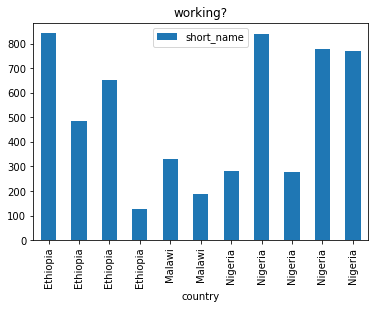

In [53]:
# plot
grouped1.plot.bar(x='country', y='short_name', title='working?') #, subplots=True, index='country');

In [27]:
# check a sample
data_employment_short_sample = data_employment_short.sample(n=10_000)

In [28]:
data_employment_short_sample.to_csv('data/data_employment_short_sample.csv')

In [9]:
# check RECOVR data from Burkina Faso
BF_recovr = pd.io.stata.read_stata('/Users/pault/paultangerusda drive/2020_Sync/COVID analysis (Paul Tanger)/data/SME_data/RECOVR_Burkina_Faso/Round 1 Data/BFA_RECOVR_round1.dta')

In [10]:
BF_recovr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1357 entries, 0 to 1356
Columns: 279 entries, SubmissionDate to PPI
dtypes: category(174), float32(1), float64(8), int16(1), int32(1), int8(3), object(91)
memory usage: 1.3+ MB


In [11]:
BF_recovr.head()

,SubmissionDate,starttime,endtime,username,duration,caseid,provider,type,country,replicate_id,...,end_end,call_status,call_status_label,instanceID,formdef_version,key,area,dem5v,dem7_op,PPI
0,6/6/2020 9:25,6/6/2020 8:27,6/6/2020 8:23,e2,4119,5.0,Onatel,Mobile,Burkina Faso,1,...,2020-Jun-6 09:54:23,Completed,Entretien complet/terminÃ©,uuid:4e436dc2-ddb4-41d3-8da9-c78dae3e68af,2006060148,uuid:4e436dc2-ddb4-41d3-8da9-c78dae3e68af,Urbain,604,NaN,0.525129
1,6/9/2020 8:28,6/9/2020 9:57,6/9/2020 10:20,e8,1406,10.0,Onatel,Mobile,Burkina Faso,1,...,2020-Jun-9 10:18:52,Completed,Entretien complet/terminÃ©,uuid:fb939c82-12a1-4bc5-901c-ca2cf2c7d2ef,2006082317,uuid:fb939c82-12a1-4bc5-901c-ca2cf2c7d2ef,Urbain,106,NaN,0.301776
2,6/6/2020 9:54,6/6/2020 9:09,6/6/2020 10:21,e12,3317,34.0,Onatel,Mobile,Burkina Faso,1,...,2020-Jun-6 10:05:00,Completed,Entretien complet/terminÃ©,uuid:8a582ee3-a205-4c4c-bb96-50f6659de48c,2006060148,uuid:8a582ee3-a205-4c4c-bb96-50f6659de48c,Rural,515,NaN,0.454815
3,6/8/2020 7:28,6/8/2020 7:38,6/8/2020 8:00,e13,1001,37.0,Onatel,Mobile,Burkina Faso,1,...,2020-Jun-8 08:00:11,Completed,Entretien complet/terminÃ©,uuid:4f197c49-377b-411f-8c19-a571c1def818,2006071937,uuid:4f197c49-377b-411f-8c19-a571c1def818,Urbain,163,NaN,0.927115
4,6/6/2020 9:25,6/6/2020 8:30,6/6/2020 8:39,e2,2332,92.0,Onatel,Mobile,Burkina Faso,1,...,2020-Jun-6 14:09:59,Completed,Entretien complet/terminÃ©,uuid:dc63af57-b798-48a1-8795-80064c631574,2006060148,uuid:dc63af57-b798-48a1-8795-80064c631574,Urbain,556,NaN,0.156518


In [13]:
list(BF_recovr.columns)

['SubmissionDate',
 'starttime',
 'endtime',
 'username',
 'duration',
 'caseid',
 'provider',
 'type',
 'country',
 'replicate_id',
 'sampling',
 'last_call_status',
 'num_calls',
 'call_num',
 'stop_at',
 'now_closed',
 'now_complete',
 'users',
 'pub_to_users',
 'supervisor',
 'supervisor_id',
 'call_date',
 'call_reached',
 'start_intro',
 'cons1',
 'cons1_osp',
 'tmp_cons1_dsp',
 'cons1_b',
 'reassign',
 'reassign_formid',
 'cons1_c',
 'dem1',
 'dem1_1',
 'dem1_fin',
 'dem1c',
 'cons1_e',
 'cons1_f',
 'cons2',
 'cons3',
 'end_intro',
 'start_dem',
 'dem2',
 'dem3',
 'dem3_id',
 'dem4_id',
 'dem5_id',
 'dem6',
 'dem7',
 'dem7c',
 'dem8',
 'dem8_osp',
 'dem9',
 'dem9a',
 'dem10a',
 'dem10b',
 'dem11',
 'dem12',
 'dem13',
 'end_dem',
 'start_hlth',
 'hlth1',
 'hlth2',
 'hlth3',
 'hlth4',
 'hlth5',
 'hlth5_1',
 'hlth5_2',
 'hlth5_3',
 'hlth5_4',
 'hlth5__666',
 'hlth5_osp',
 'hlth7',
 'hlth8',
 'hlth9',
 'end_hlth',
 'start_covm',
 'cov1',
 'cov2',
 'cov3',
 'cov4a',
 'cov4',
 'cov5',

survey questions are here: https://docs.google.com/spreadsheets/d/1hiv5dr6jXcVQhgGsnRZb7pRGCJuUybud1Go1CUdRExU/edit#gid=0

In [14]:
# INC, SME questions?
check = ['inc1',
 'inc2',
 'inc3',
 'inc4',
 'inc4_osp',
 'inc5',
 'inc5_1',
 'inc5_2',
 'inc5_3',
 'sme1',
 'inc6',
 'inc6_1',
 'inc6_0',
 'sme_note',
 'sme2',
 'sme3',
 'sme4',
 'sme5',
 'sme6',
 'sme7',
 'sme8',
 'sme9',
 'sme10']

In [16]:
to_check = BF_recovr[check]

In [18]:
to_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1357 entries, 0 to 1356
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   inc1      1356 non-null   category
 1   inc2      1356 non-null   category
 2   inc3      1356 non-null   category
 3   inc4      604 non-null    category
 4   inc4_osp  1357 non-null   object  
 5   inc5      0 non-null      category
 6   inc5_1    51 non-null     category
 7   inc5_2    51 non-null     category
 8   inc5_3    50 non-null     category
 9   sme1      1357 non-null   object  
 10  inc6      793 non-null    category
 11  inc6_1    637 non-null    category
 12  inc6_0    156 non-null    category
 13  sme_note  0 non-null      category
 14  sme2      739 non-null    category
 15  sme3      741 non-null    category
 16  sme4      741 non-null    category
 17  sme5      740 non-null    category
 18  sme6      737 non-null    category
 19  sme7      735 non-null    category
 20  sme8    

In [21]:
to_check = to_check[to_check['inc2'] == 'Yes']

In [23]:
to_check = to_check.dropna(subset=['sme3'], axis=0)

In [24]:
to_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 1356
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   inc1      480 non-null    category
 1   inc2      480 non-null    category
 2   inc3      480 non-null    category
 3   inc4      370 non-null    category
 4   inc4_osp  480 non-null    object  
 5   inc5      0 non-null      category
 6   inc5_1    29 non-null     category
 7   inc5_2    29 non-null     category
 8   inc5_3    28 non-null     category
 9   sme1      480 non-null    object  
 10  inc6      476 non-null    category
 11  inc6_1    389 non-null    category
 12  inc6_0    87 non-null     category
 13  sme_note  0 non-null      category
 14  sme2      479 non-null    category
 15  sme3      480 non-null    category
 16  sme4      477 non-null    category
 17  sme5      477 non-null    category
 18  sme6      476 non-null    category
 19  sme7      475 non-null    category
 20  sme8     

In [27]:
grouped = to_check.groupby('sme2').agg('count')

In [29]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 2 entries, No to Yes
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   inc1      2 non-null      int64
 1   inc2      2 non-null      int64
 2   inc3      2 non-null      int64
 3   inc4      2 non-null      int64
 4   inc4_osp  2 non-null      int64
 5   inc5      2 non-null      int64
 6   inc5_1    2 non-null      int64
 7   inc5_2    2 non-null      int64
 8   inc5_3    2 non-null      int64
 9   sme1      2 non-null      int64
 10  inc6      2 non-null      int64
 11  inc6_1    2 non-null      int64
 12  inc6_0    2 non-null      int64
 13  sme_note  2 non-null      int64
 14  sme3      2 non-null      int64
 15  sme4      2 non-null      int64
 16  sme5      2 non-null      int64
 17  sme6      2 non-null      int64
 18  sme7      2 non-null      int64
 19  sme8      2 non-null      int64
 20  sme9      2 non-null      int64
 21  sme10     2 non-null      int64
dt

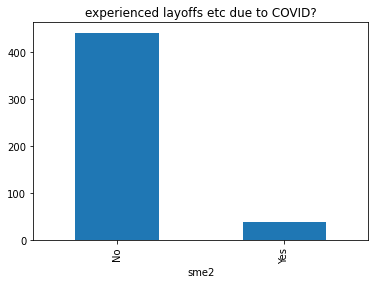

In [33]:
grouped['sme3'].plot.bar('sme3', title='experienced layoffs etc due to COVID?');